## Overview

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.     Size of training set: 10683 records Size of test set: 2671 records FEATURES: Airline: The name of the airline. Date_of_Journey: The date of the journey Source: The source from which the service begins. Destination: The destination where the service ends. Route: The route taken by the flight to reach the destination. Dep_Time: The time when the journey starts from the source. Arrival_Time: Time of arrival at the destination. Duration: Total duration of the flight. Total_Stops: Total stops between the source and destination. Additional_Info: Additional information about the flight Price: The price of the ticket

## Importing required Libraries

In [189]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.4f' % x)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


## Importing Scikit Libraries


In [190]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor

In [191]:
flight_train = pd.read_excel('./Flight_Ticket_Participant_Datasets/Data_Train.xlsx')

In [192]:
flight_train.shape

(10683, 11)

In [193]:
flight_test = pd.read_excel('./Flight_Ticket_Participant_Datasets/Test_set.xlsx')

In [194]:
flight_test.shape

(2671, 10)

In [195]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [196]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [197]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [198]:
flight_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


### Merge both train and test data, so we can do data cleaning on both datasets.

In [199]:
flight_df = pd.concat([flight_train, flight_test])

In [200]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0000
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0000
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0000
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0000
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0000


In [201]:
flight_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,nan
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,nan
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,nan
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,nan
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,nan


In [202]:
flight_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

## Data cleaning

In [203]:
flight_df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [204]:
flight_df[flight_df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0000


In [205]:
flight_df = flight_df.drop(flight_df[flight_df['Total_Stops'].isnull()].index)

### Total_Stops 

In [206]:
flight_df['Total_Stops'] = flight_df['Total_Stops'].replace({'non-stop': '0 stops'})

In [207]:
flight_df['Total_Stops'] = flight_df['Total_Stops'].str.split(' ').str[0].astype('int')

### Extract hours an minutes from `Duration, Dep_Time, Arrival_Time` columns

In [208]:
flight_df['Duration_hour'] = flight_df['Duration'].str.extract('(\d+)h', expand=False).astype(float).fillna(0)
flight_df['Duration_minute'] = flight_df['Duration'].str.extract('(\d+)m', expand=False).astype(float).fillna(0)

In [209]:
flight_df['Departure_hour'] = pd.to_datetime(flight_df['Dep_Time']).dt.hour
flight_df['Departure_minute'] = pd.to_datetime(flight_df['Dep_Time']).dt.minute

In [210]:
flight_df['Arrival_hour'] = pd.to_datetime(flight_df['Arrival_Time']).dt.hour
flight_df['Arrival_minute'] = pd.to_datetime(flight_df['Arrival_Time']).dt.minute

### Extract day, month, year from `Date_of_Journey` column

In [211]:
flight_df['Day'] = pd.to_datetime(flight_df['Date_of_Journey']).dt.day
flight_df['Month'] = pd.to_datetime(flight_df['Date_of_Journey']).dt.month
flight_df['Year'] = pd.to_datetime(flight_df['Date_of_Journey']).dt.year

In [212]:
# Drop these columns
flight_df.drop(['Duration', 'Dep_Time', 'Arrival_Time', 'Date_of_Journey'],axis=1,inplace=True)

### `Route` feature represent  path taken by the flight to reach the destination.  `Total_Stops` also represent  imformation, so I have decided to drop this.

In [213]:
flight_df.drop(['Route'],axis=1,inplace=True)

### As we can see `No info` and `No Info` values are same. We can handle as follow

In [214]:
flight_df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [215]:
flight_df['Additional_Info'].replace({"No Info": 'No info'}, inplace = True)

In [216]:
flight_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Duration_hour,Duration_minute,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Day,Month,Year
0,IndiGo,Banglore,New Delhi,0,No info,3897.0000,2.0000,50.0000,22,20,1,10,24,3,2019
1,Air India,Kolkata,Banglore,2,No info,7662.0000,7.0000,25.0000,5,50,13,15,5,1,2019
2,Jet Airways,Delhi,Cochin,2,No info,13882.0000,19.0000,0.0000,9,25,4,25,6,9,2019
3,IndiGo,Kolkata,Banglore,1,No info,6218.0000,5.0000,25.0000,18,5,23,30,5,12,2019
4,IndiGo,Banglore,New Delhi,1,No info,13302.0000,4.0000,45.0000,16,50,21,35,3,1,2019


### Airline feature

In [217]:
flight_train.groupby('Airline')['Price'].agg(['mean', 'count'])

,mean,count
Airline,,
Air Asia,5590.2602,319
Air India,9611.2106,1752
GoAir,5861.0567,194
IndiGo,5673.6829,2053
Jet Airways,11643.9234,3849
Jet Airways Business,58358.6667,6
Multiple carriers,10902.6781,1196
Multiple carriers Premium economy,11418.8462,13
SpiceJet,4338.2848,818


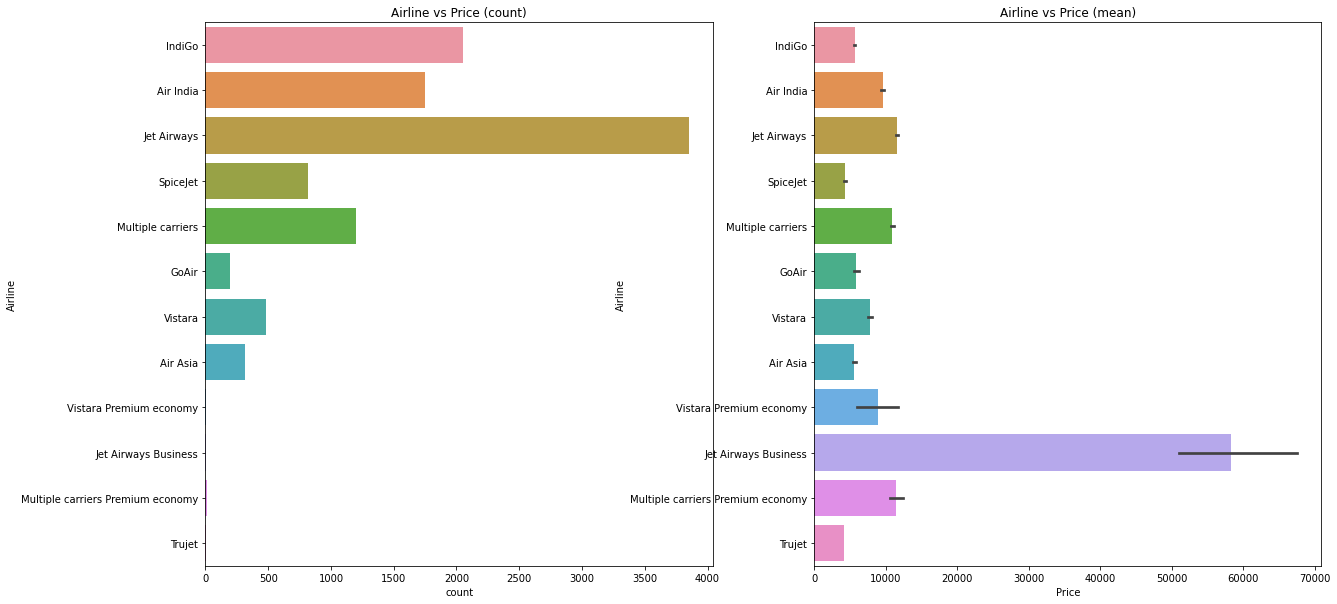

In [218]:
# Airline vs Price
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.countplot(y=flight_train['Airline'])
plt.title("Airline vs Price (count)")

plt.subplot(1,2,2)
sns.barplot(x = "Price", y = "Airline", data = flight_train)
plt.title("Airline vs Price (mean)")
plt.show()

### `Jet Airways` have highest flight count
### `Jet Airways Business` have the highest Price.

### Source feature

In [219]:
flight_train.groupby('Source')['Price'].agg(['mean', 'count'])

,mean,count
Source,,
Banglore,8017.4643,2197
Chennai,4789.8924,381
Delhi,10539.4391,4537
Kolkata,9158.3894,2871
Mumbai,5059.7088,697


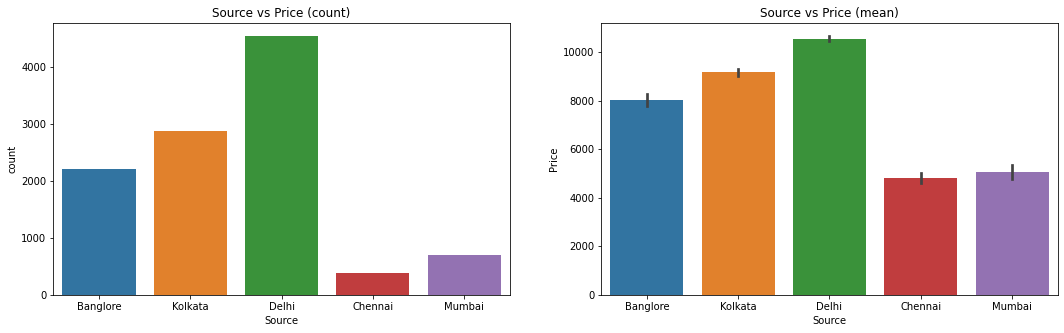

In [220]:
# Source vs Price
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.countplot(flight_train['Source'])
plt.title("Source vs Price (count)")

plt.subplot(1,2,2)
sns.barplot(y = "Price", x = "Source", data = flight_train)
plt.title("Source vs Price (mean)")
plt.show()

### `Delhi`  source are high in number

### Destination feature

In [221]:
flight_train.groupby('Destination')['Price'].agg(['mean', 'count'])

,mean,count
Destination,,
Banglore,9158.3894,2871
Cochin,10539.4391,4537
Delhi,5143.9186,1265
Hyderabad,5059.7088,697
Kolkata,4789.8924,381
New Delhi,11917.7167,932


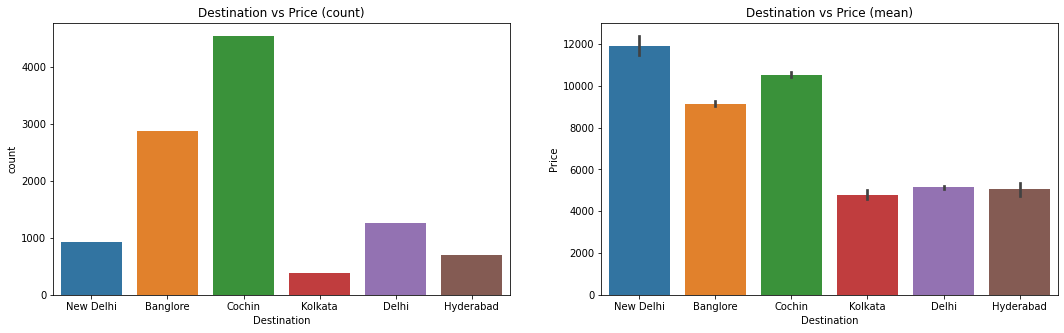

In [222]:
# Destination vs Price
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.countplot(flight_train['Destination'])
plt.title("Destination vs Price (count)")

plt.subplot(1,2,2)
sns.barplot(y = "Price", x = "Destination", data = flight_train)
plt.title("Destination vs Price (mean)")
plt.show()

### `Cochin`  source are high in number

### Use of label encoding for categorical variable

In [223]:
flight_df["Airline"]= flight_df["Airline"].replace(
    {
        'IndiGo':1, 'Air India':2, 'Jet Airways':3, 'SpiceJet':4,
        'Multiple carriers':5, 'GoAir':6, 'Vistara':7, 'Air Asia':8,
        'Vistara Premium economy':9, 'Jet Airways Business':10,
        'Multiple carriers Premium economy':11, 'Trujet':12
    }
)

In [224]:
flight_df["Source"]= flight_df["Source"].replace(
    {
        'Banglore':1, 'Kolkata':4, 'Delhi':3, 'Chennai':2, 'Mumbai':5
    }
)


In [225]:
flight_df["Destination"]= flight_df["Destination"].replace(
    {
        'New Delhi':6, 'Banglore':1, 'Cochin':2, 'Kolkata':5, 'Delhi':3, 'Hyderabad':4
    }
)

In [228]:
flight_df["Additional_Info"]= flight_df["Additional_Info"].replace(
    {
        'No info':1, 'In-flight meal not included':2,
        'No check-in baggage included':3, '1 Short layover':4,
        '1 Long layover':5, 'Change airports':6, 'Business class':7,
        'Red-eye flight':8, '2 Long layover':9
    }
)

In [273]:
flight_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Duration_hour,Duration_minute,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Day,Month,Year
0,1,1,6,0,1,3897.0000,2.0000,50.0000,22,20,1,10,24,3,2019
1,2,4,1,2,1,7662.0000,7.0000,25.0000,5,50,13,15,5,1,2019
2,3,3,2,2,1,13882.0000,19.0000,0.0000,9,25,4,25,6,9,2019
3,1,4,1,1,1,6218.0000,5.0000,25.0000,18,5,23,30,5,12,2019
4,1,1,6,1,1,13302.0000,4.0000,45.0000,16,50,21,35,3,1,2019


#### Function to print R2, MSE, RMSE

In [230]:
def evaluation_metric(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    metric = 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())
    print("Evaluation metric score:", metric)

In [231]:
def eval_mat(model):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    r2_train = r2_score(y_pred_train, y_train)
    r2_test = r2_score(y_pred_test, y_test)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    print("Train R2", r2_train)
    print("Test R2", r2_test)
    print("--"*20)

    print("Train mse", mse_train)
    print("Test mse", mse_test)
    print("--"*20)

    print("Train rmse", mse_train**0.5)
    print("Test rmse", mse_test**0.5)
    print("--"*20)

    return y_pred_train, y_pred_test

#### Function to plot scatter plot of feature

In [258]:
# Scatter plot 
def feature_plot(model):
    trace = go.Scatter(
        y = model.coef_value,
        x = model.index,
        mode='markers',
        marker=dict(
            sizemode = 'diameter',
            sizeref = 1.3,
            size = 12,
            color = model.coef_value,
            colorscale='Portland',
            showscale=True
        ),
        text = model.index

    )
    data = [trace]

    layout= go.Layout(
        autosize= True,
        title= 'Model Feature Importance',
        hovermode= 'closest',
         xaxis= dict(
             ticklen= 5,
             showgrid=False,
            zeroline=False,
            showline=False
         ),
        yaxis=dict(
            title= 'Feature Importance',
            showgrid=False,
            zeroline=False,
            ticklen= 5,
            gridwidth= 2
        ),
        showlegend= False,
        height=450
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig,filename='scatter')

In [233]:
# Get train data from merged dataframe
flight_train = flight_df.iloc[:10682, :]

In [234]:
# Get test data from merged dataframe
flight_test = flight_df.iloc[10682:, :]

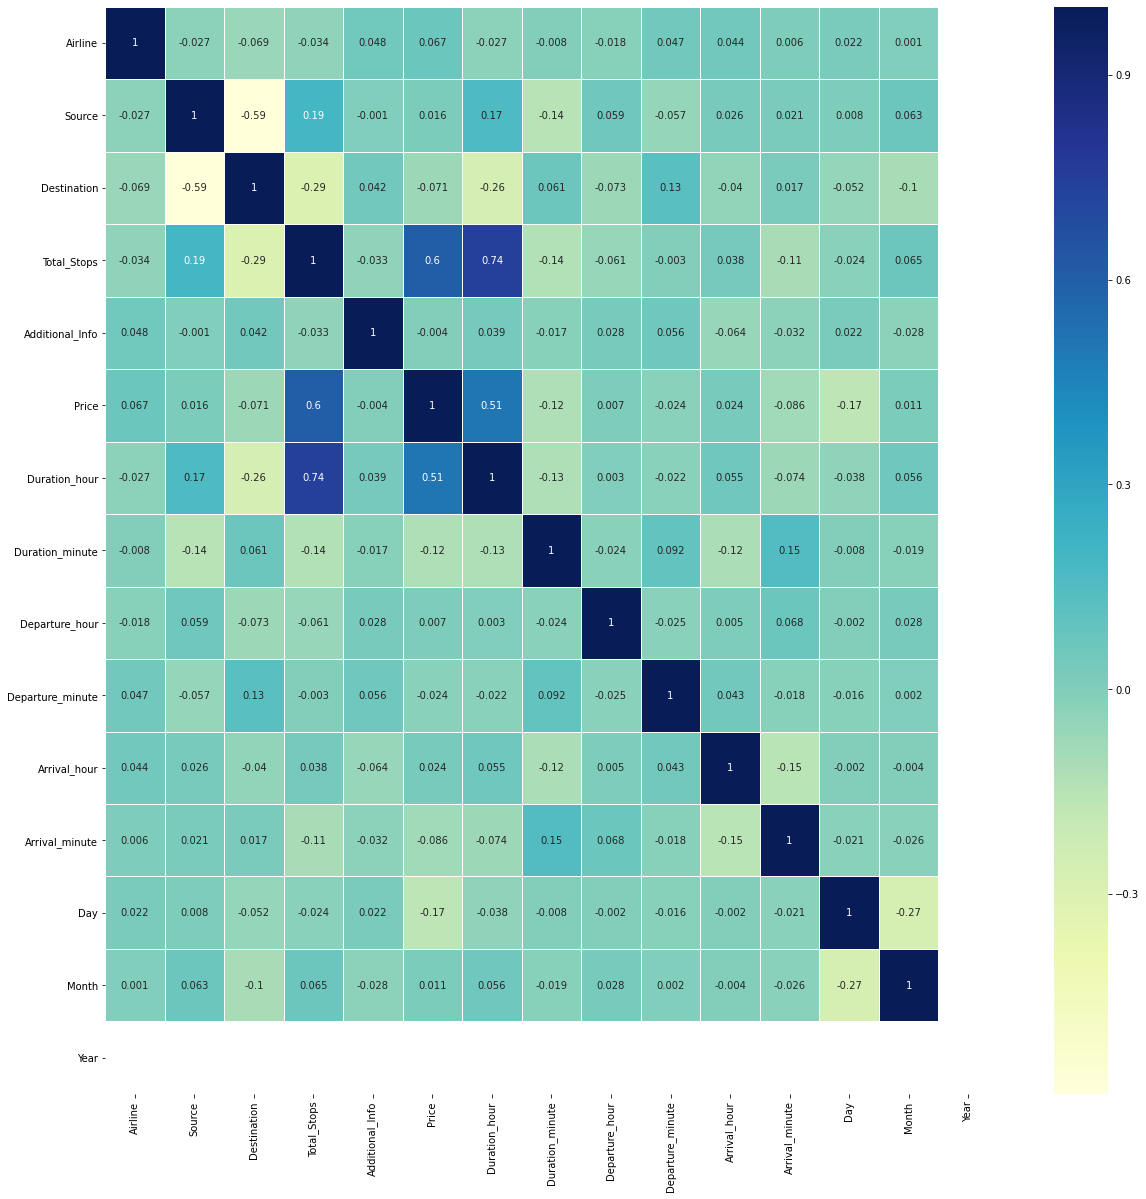

In [274]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(round(flight_train.corr(), 3), annot = True, cmap="YlGnBu", linewidth = 0.5)
plt.savefig("corr")
plt.show()

## Splitting the Data into Training and Testing Sets


### Split the data into two part
- Train data
- Test data

In [237]:
X = flight_train.drop('Price',axis=1)
y = flight_train['Price']

In [238]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size = 0.70,  random_state = 100)

## Building Regression Model

In [239]:
xgb_model =  XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [240]:
# returns metric (r2, rss, mse, rmse), train prediction, test prediction
y_pred_train, y_pred_test = eval_mat(xgb_model)

Train R2 0.9716041003564462
Test R2 0.8968337206642133
----------------------------------------
Train mse 572578.7327074837
Test mse 1952765.556329142
----------------------------------------
Train rmse 756.6893237699893
Test rmse 1397.4138815430244
----------------------------------------


In [241]:
evaluation_metric(y_test, y_pred_test)

Evaluation metric score: 0.940395544586153


In [243]:
xgb_model.score(X_train,y_train), xgb_model.score(X_test,y_test)

(0.9732416622582735, 0.9067470383702166)

### Hyperparameter tunning

In [244]:
# A parameter grid for XGBoost
params = {
            'n_estimators' : [200, 500],
            'learning_rate' : [0.02, 0.05],
            'min_child_weight': [1, 5],
            'gamma': [0.1],
            'subsample': [0.8],
            'colsample_bytree': [0.6],
            'max_depth': [10, 12]
        }

folds = 3
param_comb = 100

In [245]:
xgb_rand_search = XGBRegressor(n_jobs = -1)
random_search = RandomizedSearchCV(xgb_rand_search, param_distributions=params, n_iter=param_comb, n_jobs=-1, cv=folds, verbose=3, random_state=42)

In [246]:
# random_search.fit(X_train, y_train)

In [247]:
# best parameter
# random_search.best_params_

In [248]:
# subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=10, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6

In [249]:
# best estimator
# xgb_best = random_search.best_estimator_
xgb_best = XGBRegressor(subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=10, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6)
xgb_best.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [250]:
# returns metric (r2, mse, rmse), train prediction, test prediction
y_pred_train, y_pred_test = eval_mat(xgb_best)

Train R2 0.9847257134803047
Test R2 0.908391883425296
----------------------------------------
Train mse 310123.9562045669
Test mse 1651532.6629016001
----------------------------------------
Train rmse 556.8877411153588
Test rmse 1285.1197076154424
----------------------------------------


In [251]:
evaluation_metric(y_test, y_pred_test)

Evaluation metric score: 0.9461955751880166


In [252]:
xgb_best.score(X_train,y_train), xgb_best.score(X_test,y_test)

(0.9855069685828488, 0.921132205786439)

In [253]:
# residuals
residual = y_test - y_pred_test

Text(0.5, 1.0, 'Normality of error terms/residuals')

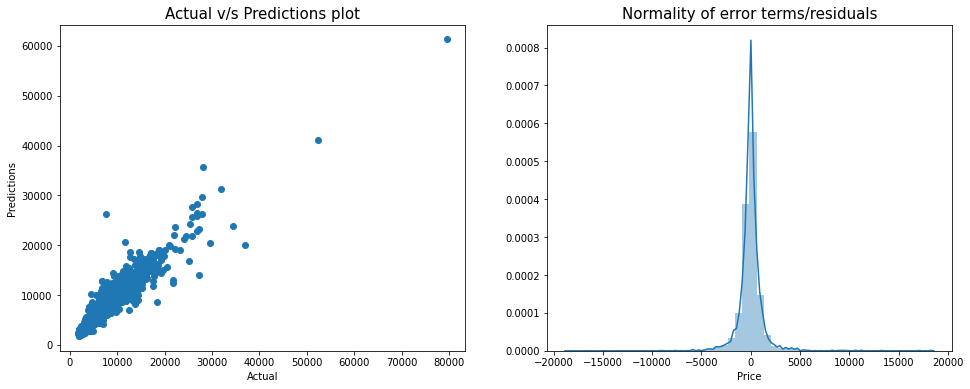

In [254]:
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual v/s Predictions plot", fontdict={'fontsize': 15})

plt.subplot(1,2,2)
sns.distplot(residual)
plt.title('Normality of error terms/residuals', fontdict={'fontsize': 15})

### Feature importances

In [255]:
features = pd.DataFrame(xgb_best.feature_importances_, columns=['coef_value']).set_index(X.columns)
features = features.sort_values(by='coef_value', ascending=False)

In [256]:
features.head()

,coef_value
Total_Stops,0.3593
Airline,0.1329
Additional_Info,0.1123
Duration_hour,0.1058
Day,0.0747


In [259]:
feature_plot(features)

## Final model for given train and test data

### Build model on original train data

In [260]:
xgb_final_model =  XGBRegressor(subsample=0.8, n_estimators=500, min_child_weight=1, 
                                 max_depth=10, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6)
xgb_final_model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [261]:
xgb_final_model.score(X, y)

0.9830384907600416

In [267]:
evaluation_metric(y, xgb_final_model.predict(X))

Evaluation metric score: 0.9707401487765339


### Predict flight `Price` on given test data

In [268]:
X_test_final = flight_test.drop('Price',axis=1)
y_test_final = flight_test['Price']

In [269]:
final_price = xgb_final_model.predict(X_test_final)
final_price = pd.DataFrame(final_price, columns=['Price'])
final_price.head()

,Price
0,14046.6836
1,4297.8931
2,12706.7939
3,10964.0205
4,3682.0635


### Create new `xlsx` file for test data

In [270]:
# final_price.to_excel("output.xlsx", index = False)

### Feature importances on final model

In [271]:
features = pd.DataFrame(xgb_final_model.feature_importances_, columns=['coef_value']).set_index(X.columns)
features = features.sort_values(by='coef_value', ascending=False)
features.head()

,coef_value
Total_Stops,0.2716
Airline,0.1562
Duration_hour,0.1287
Additional_Info,0.1154
Destination,0.0945


In [272]:
feature_plot(features)